# Evaluate trained model

In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
import cv2

import sys
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image


try:
    from labinet.io_util import load_label_map
    from labinet.io_util import load_model
    import labinet.object_detect
    import labinet.box
except ImportError:
    # This part is only required to run the notebook
    # directory when the module itself is not installed.
    #
    # If you have the module installed, just use "import labinet..."
    import os
    import inspect
    # the .travis.yml is coded so that we execute tests from within test subdir. Relative to 'test' the .py is found in ../source/dev
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile(inspect.currentframe()))[0], "..")))
    if cmd_subfolder not in sys.path:
        sys.path.insert(0, cmd_subfolder)
    from labinet.io_util import load_label_map
    from labinet.io_util import load_model
    import labinet.object_detect
    import labinet.box

%aimport labinet.io_util
%aimport labinet.object_detect
%aimport labinet.box

%matplotlib inline

## change path, model name etc to your needs

In [3]:
MODEL_NAME = 'inference_graph'   # the result from Step 6 Export Inference Graph
IMAGE_PATH = 'images/train'
IMAGE_NAME = '01-20190414173244-01.jpg'   # cmdline arg
# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
CWD_PATH = os.path.join(os.getcwd(),'..')  # should become gitbase
NUM_CLASSES = 1

In [4]:
# model
PATH_TO_MODEL = os.path.join(CWD_PATH, MODEL_NAME, 'frozen_inference_graph.pb')
# label map
LABEL_MAP = os.path.join(CWD_PATH, 'data', 'object-detection.pbtxt')
# path to image
PATH_TO_IMAGE = os.path.join(CWD_PATH, IMAGE_PATH, IMAGE_NAME)

## Load (frozen) Model into Memory

In [5]:
detection_graph = load_model(PATH_TO_MODEL)

   

### load labels 

In [6]:
categories, category_index = load_label_map(LABEL_MAP, NUM_CLASSES)

## Run Inference : Object Detection 
_load the image and run on it the object detection_

In [120]:
# load image
image =  Image.open(PATH_TO_IMAGE)
#imshow(np.asarray(image))
#print(image.shape()

# inference
output_dict = labinet.object_detect.run_inference_for_single_image(image, detection_graph)

tensor:0 for image.shape=(x=480,y=640)


### Visualize result

01-20190414173244-01.jpg
(640, 480, 3)


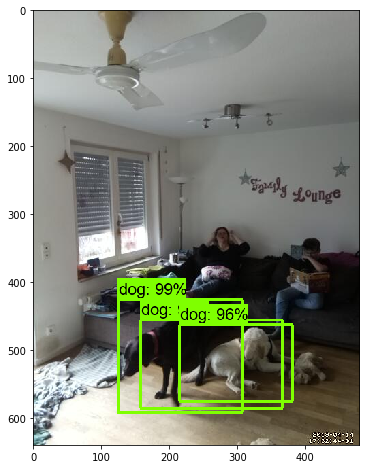

In [121]:
image_with_boxes = labinet.object_detect.visualize_boxes_after_detection(image, output_dict, category_index)
# All the results have been drawn on image. Now display the image.
plt.figure(figsize=IMAGE_SIZE)
plt.imshow(image_with_boxes)
print(IMAGE_NAME)
print(image_with_boxes.shape)

## Write Result as XML
_use the xml file to laod image in labelImg and check correct boxing_

In [40]:
boxes = output_dict['detection_boxes']
scores = output_dict['detection_scores']
boxes_to_use = labinet.object_detect.get_boxes_to_use(boxes, scores)

In [17]:
# we need the box' coordinates relative to the image size
boxes_normed = []
for box in boxes_to_use:
    box_normed = labinet.box.get_normalized_coordinates(box, image.size)
    boxes_normed.append(box_normed)

In [54]:
%aimport labinet.box

xml = labinet.box.box_to_labelimg_xml(IMAGE_NAME, image.size, boxes_normed, imagepath=PATH_TO_IMAGE)
ET.dump(xml)
xmlfname = PATH_TO_IMAGE[:-4]+".xml"
xml.write(xmlfname)

<annotation><folder>images</folder><filename>01-20190414173244-01.jpg</filename><path>C:\Users\Carsten\Documents\python\object_detection\labinet\notebook\..\images\01-20190414173244-01.jpg</path><source><database>Unknown</database></source><size><width>480</width><height>640</height><depth>3</depth></size><segmented>0</segmented><object><name>dog</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>124</xmin><xmax>307</xmax><ymin>426</ymin><ymax>591</ymax></bndbox></object><object><name>dog</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>157</xmin><xmax>366</xmax><ymin>456</ymin><ymax>585</ymax></bndbox></object><object><name>dog</name><pose>Unspecified</pose><truncated>0</truncated><difficult>0</difficult><bndbox><xmin>214</xmin><xmax>381</xmax><ymin>463</ymin><ymax>575</ymax></bndbox></object></annotation>


## Do inference an all new files


In [7]:
NEW_IMAGE_PATH = os.path.join(CWD_PATH, 'new_images')
files = os.listdir(NEW_IMAGE_PATH)
print(f"Infer image in: {NEW_IMAGE_PATH}")

Infer image in: C:\Users\Carsten\Documents\python\object_detection\labinet\notebook\..\new_images


In [8]:
print(files)

['01-20190719203946-00.jpg', '01-20190719203951-00.jpg', '01-20190719203956-00.jpg', '01-20190719204001-00.jpg', '01-20190719204006-00.jpg', '01-20190719204011-00.jpg', '01-20190719204016-00.jpg', '01-20190719204021-00.jpg', '01-20190719204026-00.jpg', '01-20190719204031-00.jpg', '01-20190719204036-00.jpg', '01-20190719204041-00.jpg', '01-20190719204046-00.jpg', '01-20190719204051-00.jpg', '01-20190719204056-00.jpg', '01-20190719204101-00.jpg', '01-20190719204106-00.jpg', '01-20190719204111-00.jpg', '01-20190719204116-00.jpg', '02-20190719204251-00.jpg', '03-20190719205611-00.jpg', '03-20190719205616-00.jpg', '03-20190719205621-00.jpg', '03-20190719205626-00.jpg', '03-20190719205631-00.jpg', '03-20190719205636-00.jpg', '03-20190719205641-00.jpg', '03-20190719205651-00.jpg', '04-20190719205851-00.jpg', '04-20190719205856-00.jpg', '05-20190719210016-00.jpg', '05-20190719210021-00.jpg', '05-20190719210026-00.jpg', '05-20190719210031-00.jpg', '05-20190719210036-00.jpg', '05-20190719210041-

In [9]:
# # SLOW SLOW SLOW (but works)

def infer_on_all_files_slow(files):
    for fname in files:
        if fname.endswith('jpg'):
            image_file = os.path.join(NEW_IMAGE_PATH, fname)
            print(f'inference on: {fname}')
            image =  Image.open(image_file)
            output_dict = labinet.object_detect.run_inference_for_single_image(image, detection_graph)
            boxes = output_dict['detection_boxes']
            scores = output_dict['detection_scores']
            boxes_to_use = labinet.object_detect.get_boxes_to_use(boxes, scores)
            boxes_normed = []
            print(f'found {len(boxes_to_use)} objects')
            for box in boxes_to_use:
                box_normed = labinet.box.get_normalized_coordinates(box, image.size)
                boxes_normed.append(box_normed)
                print(box_normed)
            xml = labinet.box.box_to_labelimg_xml(fname, image.size, boxes_normed, imagepath=image_file)
            xmlfname = image_file[:-4]+".xml"
            #xml.write(xmlfname)
            break


```
inference on: 01-20190414173236-00.jpg
found 2 objects
{'xmin': 216, 'xmax': 367, 'ymin': 392, 'ymax': 513}
{'xmin': 421, 'xmax': 480, 'ymin': 452, 'ymax': 618}
```

In [9]:
import numpy as np
#print(image_np_exp.shape)
import tensorflow as tf
image_width=480
image_height=640
#image_np_exp = np.expand_dims(labinet.io_util.load_image_into_numpy_array(image), axis=0) 
#image_np_exp.shape  # 1, 640, 480, 3


In [10]:
tensor_dict = labinet.object_detect.get_tensor_dict_with_masks(image_width, image_height, detection_graph)
image_tensor = tensor_dict['image_tensor']
config = tf.ConfigProto()
config.gpu_options.allow_growth=True

with tf.Session(graph=detection_graph, config=config) as sess:
    for fname in files:
        if fname.endswith('jpg'):
            # load and converte image
            image_file = os.path.join(NEW_IMAGE_PATH, fname)
            print(f'inference on: {fname}')
            image =  Image.open(image_file)
            image_np_exp = np.expand_dims(labinet.io_util.load_image_into_numpy_array(image), axis=0) 
            
            # inference
            output_dict = sess.run(tensor_dict, feed_dict={image_tensor: image_np_exp})
            labinet.object_detect.convert_output_dict(output_dict)

            # boxes to xml
            boxes = output_dict['detection_boxes']
            scores = output_dict['detection_scores']
            boxes_to_use = labinet.object_detect.get_boxes_to_use(boxes, scores)
            boxes_normed = []
            print(f'found {len(boxes_to_use)} objects')
            for box in boxes_to_use:
                box_normed = labinet.box.get_normalized_coordinates(box, image.size)
                boxes_normed.append(box_normed)
                print(box_normed)
            xml = labinet.box.box_to_labelimg_xml(fname, image.size, boxes_normed, imagepath=image_file)
            # xml to disk
            xmlfname = image_file[:-4]+".xml"
            xml.write(xmlfname)
            #break - comment in to test for 1 file only


set: num_detections:0
set: detection_boxes:0
set: detection_scores:0
set: detection_classes:0
set: image_tensor:0
tensor:0 for image.shape=(x=480,y=640)
inference on: 01-20190719203946-00.jpg
found 0 objects
inference on: 01-20190719203951-00.jpg
found 1 objects
{'xmin': 254, 'xmax': 342, 'ymin': 218, 'ymax': 386}
inference on: 01-20190719203956-00.jpg
found 2 objects
{'xmin': 0, 'xmax': 112, 'ymin': 358, 'ymax': 485}
{'xmin': 220, 'xmax': 341, 'ymin': 285, 'ymax': 384}
inference on: 01-20190719204001-00.jpg
found 2 objects
{'xmin': 1, 'xmax': 132, 'ymin': 380, 'ymax': 482}
{'xmin': 226, 'xmax': 336, 'ymin': 284, 'ymax': 383}
inference on: 01-20190719204006-00.jpg
found 1 objects
{'xmin': 2, 'xmax': 136, 'ymin': 382, 'ymax': 484}
inference on: 01-20190719204011-00.jpg
found 2 objects
{'xmin': 2, 'xmax': 133, 'ymin': 383, 'ymax': 483}
{'xmin': 223, 'xmax': 329, 'ymin': 293, 'ymax': 380}
inference on: 01-20190719204016-00.jpg
found 2 objects
{'xmin': 3, 'xmax': 134, 'ymin': 383, 'ymax': 

found 1 objects
{'xmin': 386, 'xmax': 472, 'ymin': 339, 'ymax': 512}
inference on: 07-20190719210641-00.jpg
found 0 objects
inference on: 07-20190719210646-00.jpg
found 0 objects
inference on: 07-20190719210651-00.jpg
found 0 objects
inference on: 07-20190719210656-00.jpg
found 0 objects
inference on: 07-20190719210701-00.jpg
found 1 objects
{'xmin': 386, 'xmax': 470, 'ymin': 345, 'ymax': 514}
inference on: 07-20190719210706-00.jpg
found 0 objects
inference on: 07-20190719210711-00.jpg
found 1 objects
{'xmin': 387, 'xmax': 471, 'ymin': 343, 'ymax': 518}
inference on: 07-20190719210716-00.jpg
found 0 objects
inference on: 07-20190719210721-00.jpg
found 1 objects
{'xmin': 386, 'xmax': 467, 'ymin': 350, 'ymax': 514}
inference on: 07-20190719210726-00.jpg
found 0 objects


In [110]:
# for everything like video stream or so... do 
# labinet.object_detect.get_tensor_dict_with_masks(...)
# with tf.Session(graph=detection_graph) as sess:
#   ....
#   output_dict = sess.run(tensor_dict, feed_dict={image_tensor: image_np_exp})
#   ....
#import cv2
